<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%202/Modulo_2_Ejercicio_2_Limpieza_Preprocesamiento_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ejercicio 2: Limpieza y Preprocesamiento de Datos**
## Identificación y tratamiento de valores atípicos, duplicados y valores faltantes.



## Introducción

En este ejercicio, aprenderemos a **limpiar y preprocesar datos** en un dataset industrial.  
Los datos del mundo real a menudo contienen valores duplicados, valores atípicos y valores faltantes, los cuales pueden afectar la calidad de los análisis y los modelos predictivos.  

📌 **Objetivos del ejercicio:**  
- Identificar y eliminar valores duplicados en el dataset.  
- Detectar outliers utilizando el **rango intercuartílico (IQR)**.  
- Aplicar técnicas de imputación de valores nulos (media, mediana y forward-fill).  
- Normalizar y estandarizar variables numéricas para mejorar la comparación de datos.  

🛠 **Conceptos clave:**  
- Detección y eliminación de duplicados  
- Manejo de valores nulos  
- Normalización y estandarización  


In [1]:

# Celda 1: Importación de librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos para gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Librerías importadas correctamente.")


Librerías importadas correctamente.



## Descripción del Dataset

Para este ejercicio, utilizaremos el dataset **"Control de calidad en circuitos electrónicos"**, alojado en GitHub.  
Este dataset contiene información sobre circuitos electrónicos y su funcionamiento en condiciones de prueba.

📂 **Fuente del dataset:**  
[GitHub - Control de calidad en circuitos electrónicos](https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_circuitos_electronicos.csv)

### **Estructura del dataset:**
| Columna               | Descripción |
|-----------------------|-------------|
| ID_componente        | Identificador único del componente |
| Voltaje_operación    | Voltaje de operación en V |
| Corriente_fuga      | Corriente de fuga en mA |
| Resistencia_circuito | Resistencia en Ohmios |
| Frecuencia_operación | Frecuencia de operación en MHz |
| Temperatura_prueba  | Temperatura de prueba en °C |
| Horas_operación     | Horas de funcionamiento del circuito |
| Proveedor_material  | Nombre del proveedor (categórico) |
| Modelo_chip         | Modelo del chip (categórico) |
| Método_prueba       | Método de prueba aplicado (categórico) |
| Fallo_circuito      | Variable objetivo (OK / KO) |


In [2]:

# Celda 2: Cargar el dataset desde GitHub

url_csv = "https://raw.githubusercontent.com/dtoralg/IE_Calidad_ML/refs/heads/main/Data/control_calidad_circuitos_electronicos.csv"
df = pd.read_csv(url_csv)

# Mostrar las primeras filas del dataset
df.head()


,ID_componente,Voltaje_operación,Corriente_fuga,Resistencia_circuito,Frecuencia_operación,Temperatura_prueba,Horas_operación,Proveedor_material,Modelo_chip,Método_prueba,Fallo_circuito
0,1,5.248357,1.934405,1055.302146,2.415568,71.648138,6826.235678,Proveedor_2,Modelo_8,Método_C,OK
1,2,4.930868,2.114882,1208.739222,2.379194,74.617461,4889.806377,Proveedor_5,Modelo_8,Método_C,OK
2,3,5.323844,2.220543,1000.776616,2.362610,83.187345,4272.656141,Proveedor_4,Modelo_10,Método_B,KO
3,4,5.761515,1.644991,792.359071,2.120637,71.668613,4639.328169,Proveedor_4,Modelo_2,Método_C,OK
4,5,4.882923,2.030222,1235.237438,2.320803,77.624833,6439.710569,Proveedor_3,Modelo_14,Método_C,OK


In [3]:

# Celda 3: Identificación y eliminación de duplicados

duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# Eliminar duplicados si existen
df = df.drop_duplicates()

print("Duplicados eliminados.")


Número de registros duplicados: 6000
Duplicados eliminados.


In [4]:

# Celda 4: Detección de valores atípicos (Outliers) usando IQR

def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < umbral_inferior) | (data[columna] > umbral_superior)]
    return outliers

# Detectar outliers en "Voltaje_operación"
outliers_voltaje = detectar_outliers_iqr(df, "Voltaje_operación")
print(f"Valores atípicos en Voltaje_operación: {len(outliers_voltaje)}")


Valores atípicos en Voltaje_operación: 829


In [5]:

# Celda 5: Identificación y manejo de valores nulos

print("Valores nulos por columna antes de la imputación:")
print(df.isnull().sum())

# Aplicación de técnicas de imputación
df["Horas_operación"].fillna(df["Horas_operación"].median(), inplace=True)

print("Valores nulos imputados correctamente.")


Valores nulos por columna antes de la imputación:
ID_componente               0
Voltaje_operación           0
Corriente_fuga              0
Resistencia_circuito        0
Frecuencia_operación        0
Temperatura_prueba          0
Horas_operación         12000
Proveedor_material          0
Modelo_chip                 0
Método_prueba               0
Fallo_circuito              0
dtype: int64
Valores nulos imputados correctamente.


<ipython-input-5-f907144f281e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Horas_operación"].fillna(df["Horas_operación"].median(), inplace=True)


In [6]:

# Celda 6: Normalización y estandarización de datos

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Aplicar MinMaxScaler a variables numéricas
scaler = MinMaxScaler()
df[["Voltaje_operación", "Corriente_fuga", "Resistencia_circuito"]] = scaler.fit_transform(
    df[["Voltaje_operación", "Corriente_fuga", "Resistencia_circuito"]])

# Aplicar StandardScaler a variables numéricas
std_scaler = StandardScaler()
df[["Frecuencia_operación", "Temperatura_prueba", "Horas_operación"]] = std_scaler.fit_transform(
    df[["Frecuencia_operación", "Temperatura_prueba", "Horas_operación"]])

print("Normalización y estandarización aplicadas correctamente.")


Normalización y estandarización aplicadas correctamente.


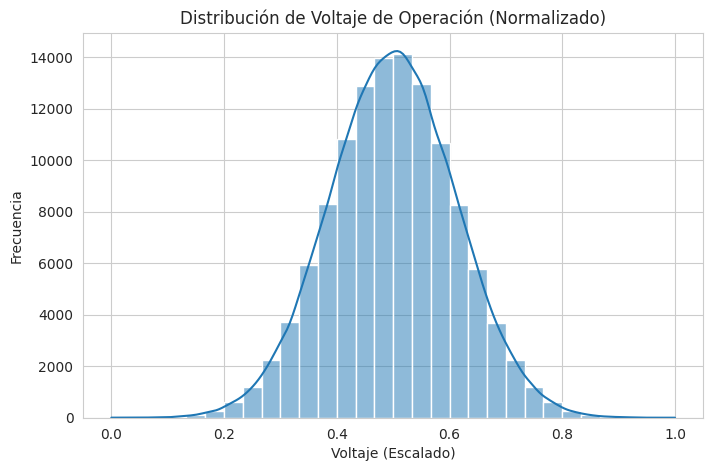

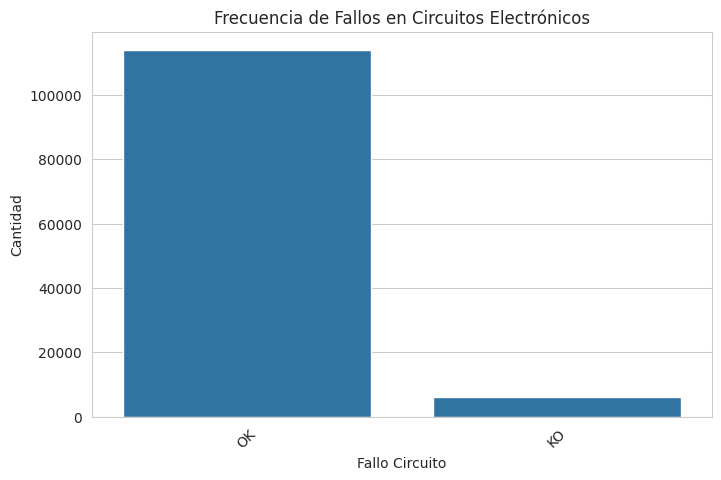

In [7]:

# Celda 7: Visualización de la distribución de los datos

# Histograma de la variable Voltaje_operación después de la normalización
plt.figure(figsize=(8,5))
sns.histplot(df["Voltaje_operación"], bins=30, kde=True)
plt.title("Distribución de Voltaje de Operación (Normalizado)")
plt.xlabel("Voltaje (Escalado)")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras para la variable objetivo "Fallo_circuito"
plt.figure(figsize=(8,5))
sns.countplot(x="Fallo_circuito", data=df, order=df["Fallo_circuito"].value_counts().index)
plt.title("Frecuencia de Fallos en Circuitos Electrónicos")
plt.xlabel("Fallo Circuito")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()



## Conclusiones

En este ejercicio hemos aplicado distintas técnicas de limpieza y preprocesamiento de datos en un dataset industrial.  

**Puntos clave:**  

*   Se identificaron y eliminaron **valores duplicados**, mejorando la calidad de los datos.
*   Se detectaron **valores atípicos** en "Voltaje_operación" usando el método **IQR**.  
*   Se imputaron **valores nulos** utilizando la mediana para evitar sesgos.
*   Se aplicaron técnicas de **normalización y estandarización** para garantizar una mejor comparabilidad entre variables numéricas.  

**¿Qué podríamos hacer a continuación?**  
- Aplicar métodos de eliminación de outliers para mejorar la calidad del dataset.  
- Evaluar otras técnicas de imputación de valores nulos, como KNN Imputer.  
- Preparar el dataset para un modelo de Machine Learning de clasificación de fallos en circuitos electrónicos.  
